In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")


In [42]:
file_path = "blogs.csv"
df = pd.read_csv(file_path)

In [43]:
df.head()


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [44]:
df.shape

(2000, 2)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


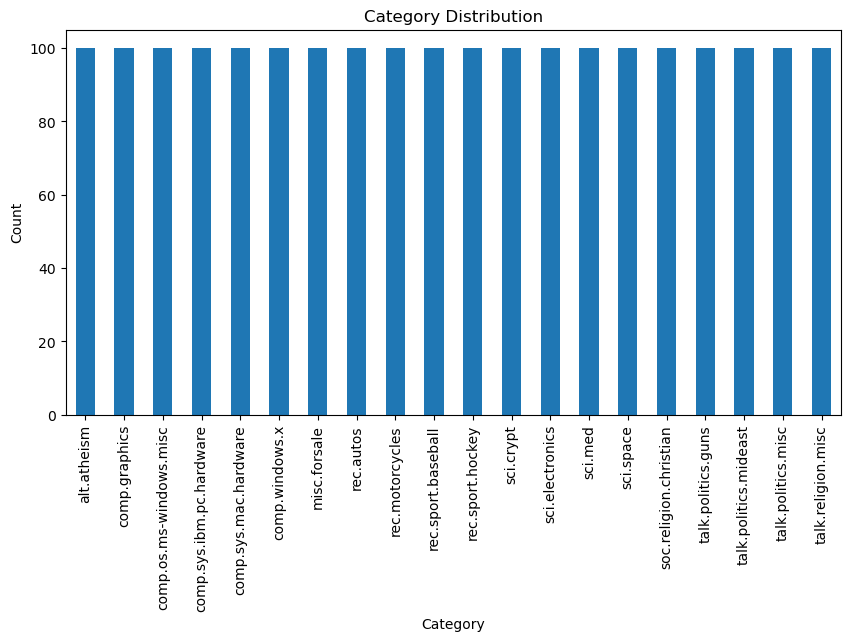

In [46]:
category_counts = df['Labels'].value_counts()

plt.figure(figsize=(10,5))
category_counts.plot(kind='bar')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [47]:
df['text_length'] = df['Data'].apply(len)


df['text_length'].describe()

count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: text_length, dtype: float64

In [48]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer




In [49]:
stop_words = set(stopwords.words('english'))

In [50]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, numbers, special chars
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [51]:
df['clean_text'] = df['Data'].apply(preprocess_text)

df[['Data', 'clean_text']].head()

,Data,clean_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism talkreli...


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform
X = vectorizer.fit_transform(df['clean_text'])

# Labels
y = df['Labels']

X.shape, y.shape

((2000, 5000), (2000,))

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [56]:
nb_model = MultinomialNB()


nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

Accuracy: 0.855

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.84      0.80      0.82        20
comp.sys.ibm.pc.hardware       0.58      0.75      0.65        20
   comp.sys.mac.hardware       0.88      0.75      0.81        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.90      0.95      0.93        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       1.00      0.95      0.97        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.85      0.85      0.85        20
                 sci.med       0.8

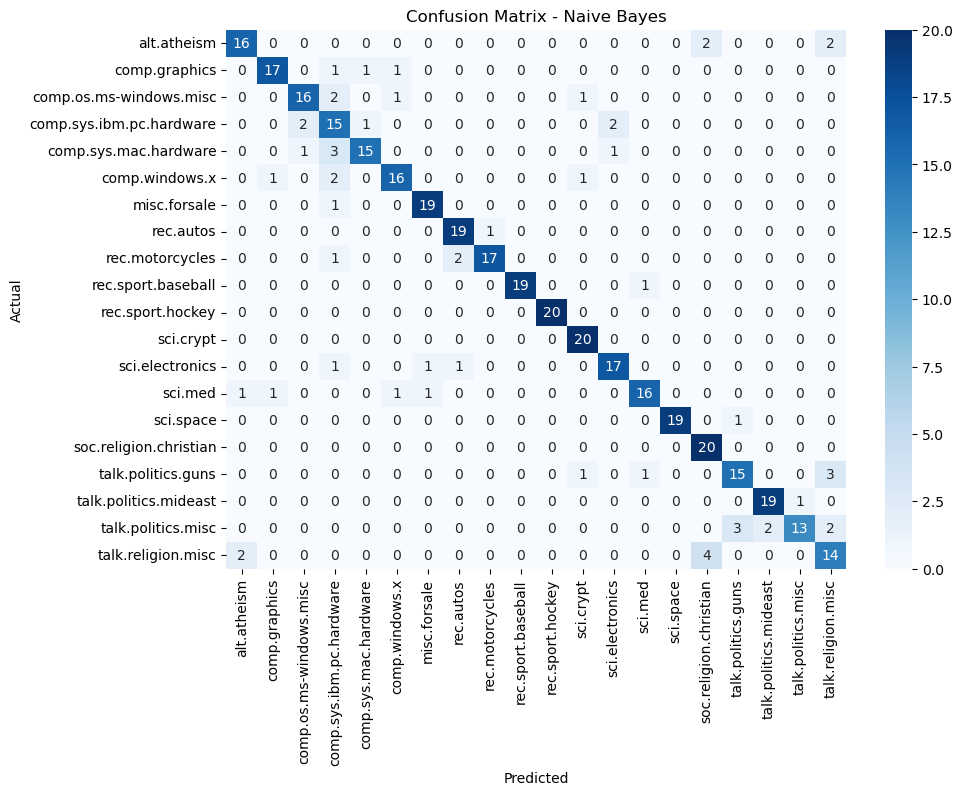

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [58]:


# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()


In [59]:
def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [60]:
df["Sentiment"] = df["Data"].apply(get_sentiment)

df[["Data", "Sentiment"]].head()

,Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,Positive


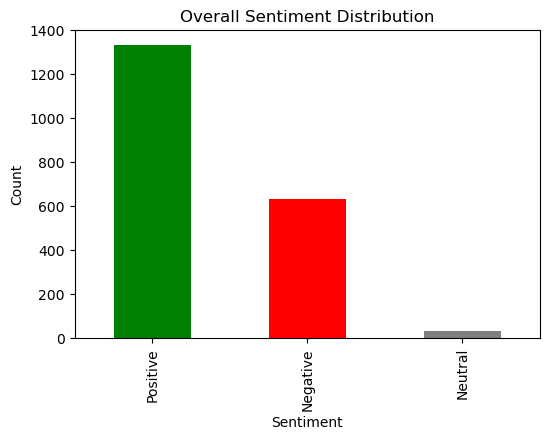

In [61]:
plt.figure(figsize=(6,4))
df["Sentiment"].value_counts().plot(kind="bar", color=["green","red","gray"])
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


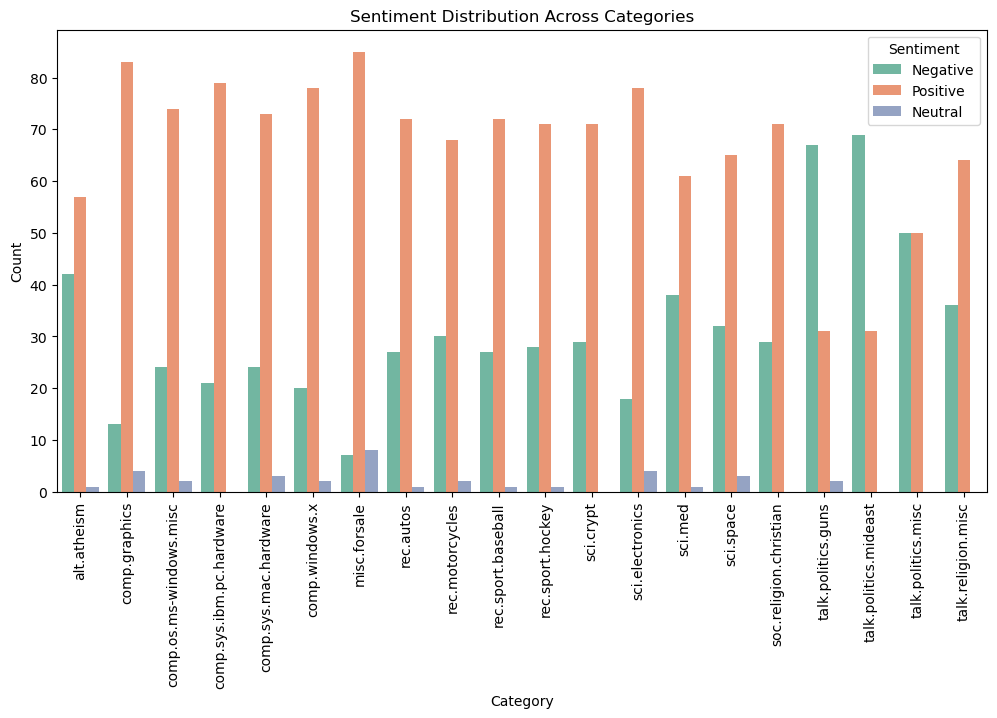

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Labels", hue="Sentiment", palette="Set2")
plt.title("Sentiment Distribution Across Categories")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [63]:
from sklearn.metrics import classification_report, accuracy_score

In [64]:
acc = accuracy_score(y_test, y_pred)
print("Naive Bayes Model Accuracy:", round(acc, 4))

# Detailed Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Naive Bayes Model Accuracy: 0.855

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.84      0.80      0.82        20
comp.sys.ibm.pc.hardware       0.58      0.75      0.65        20
   comp.sys.mac.hardware       0.88      0.75      0.81        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.90      0.95      0.93        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       1.00      0.95      0.97        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.85      0.85      0.85        20
                

In [65]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer




In [66]:
def preprocess_text(text):
   
    tokens = nltk.word_tokenize(text.lower())

    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


In [67]:
print(df.columns)


Index(['Data', 'Labels', 'text_length', 'clean_text', 'Sentiment'], dtype='object')


In [68]:
def preprocess_text(text, method="lemmatize"):
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer, PorterStemmer
    
    # Tokenize
    tokens = nltk.word_tokenize(str(text).lower())

    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    if method == "lemmatize":
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    elif method == "stem":
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]

    return " ".join(tokens)


In [69]:

df['clean_text'] = df['Data'].apply(lambda x: preprocess_text(x, method="lemmatize"))

# For stemming
df['clean_text'] = df['Data'].apply(lambda x: preprocess_text(x, method="stem"))


In [70]:

df['stemmed_text'] = df['Data'].apply(lambda x: preprocess_text(x, method="stem"))
df['lemmatized_text'] = df['Data'].apply(lambda x: preprocess_text(x, method="lemmatize"))


for i in range(5):  
    print(f"Original    : {df['Data'].iloc[i]}")
    print(f"Stemmed     : {df['stemmed_text'].iloc[i]}")
    print(f"Lemmatized  : {df['lemmatized_text'].iloc[i]}")
    print("-" * 60)


Original    : Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank
From: frank@D012S658.uucp (Frank O'Dwyer)
Newsgroups: alt.atheism
Subject: Re: islamic genocide
Date: 23 Apr 1993 23:51:47 GMT
Organization: Siemens-Nixdorf AG
Lines: 110
Distribution: world
Message-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>
References: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>
NNTP-Posting-Host: d012s658.ap.mchp.sni.de

In article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:
#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O'Dwyer) writes:
#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:
#|> #
#|> #Noting that a particular society, in this case the mainland UK,
#|> 